In [10]:
import cv2
import numpy as np
import pandas as pd

In [11]:
videoList = ["VID_20150123_172926_F.mp4.txt",
    "VID_20150123_173259_Q.mp4.txt",
    "VID_20150123_173329_F.mp4.txt",
    "VID_20150123_173358_Q.mp4.txt",
    "VID_20150123_173427_F.mp4.txt",
    "VID_20150123_173457_Q.mp4.txt",
    "VID_20150123_173556_Q.mp4.txt",
    "VID_20150123_173629_F.mp4.txt",
    "VID_20150123_173700_Q.mp4.txt",
    "VID_20150123_173757_Q.mp4.txt",
    "VID_20150123_173028_F.mp4.txt",
    "VID_20150123_172857_Q.mp4.txt"]
fps = 30.323427803

In [12]:
def readFromFile(fileName):
    l =np.loadtxt(fileName)
    return l[0], l[1], l[2]

In [13]:
def peakList(colorL, frameThreshold):
    peakL = list()
    colorlistLen = len(colorL)
    for i in range(1, colorlistLen-1):
        biggerThanPrevious = colorL[i] > colorL[i-1]
        biggerThanAfter = colorL[i] > colorL[i+1]
        #if it is a local maximum, then check if it is a RR peak by comparing its maxima interval to frameThreshold
        if biggerThanPrevious and biggerThanAfter:
            for k in range(2, frameThreshold+1):
                if i-k >= 0:
                    if not colorL[i] > colorL[i-k]:
                        #this is not a rr peak
                        break
                if i+k < colorlistLen:
                    if not colorL[i] > colorL[i+k]:
                        #this is not a rr peak
                        break
            else:
                #this IS a rr peak, store the array index
                peakL.append(i)
    return peakL

In [14]:
def rrList(peakIndexes):
    rrlist = [];
    for i in range(1,len(peakIndexes)):
        rr = (peakIndexes[i]-peakIndexes[i-1])*1/fps
        rrlist.append(rr)
    return rrlist

In [15]:
def timeList(rrList):
    times = [rrList[0]]
    for i in range(1,len(rrList)):
        times.append(times[i-1]+rrList[i])
    return times

In [16]:
thresholds = range(1,31)

In [17]:
def getError(rrList):
    errors = 0
    for rr in rrList:
        #heart beat ranges from 50 to 110 pulses per minute
            if rr<.54 or rr>1.0:
                errors = errors+1
    return errors

In [18]:
#goes through all vids, constructs matrix with vid,colors,errors
allErrors = []
for eachVideo in range(0,len(videoList)):
    allErrors.append([[],[],[]])
    
        
for nameIndex in range(0,len(videoList)):
    #for every vid, get colors
    r,g,b = readFromFile(videoList[nameIndex])
    colors = [r,g,b]
    for c in range(0,len(colors)):
        #list of errors for this paricular color and video
        errors = [0]*len(thresholds)
        for i in range(0,len(thresholds)):
        #for every vid, test each threshold for errors
        #add errors to approprate place on redErrors list
            rr = rrList(peakList(colors[c],i+1))
            if len(rr)>0:
                #relative error
                errors[i] = errors[i]+getError(rr)/(len(rr)*1.0)
            if len(rr)==0:
                #no rr intervals detected, which is obviously wrong, so 100% error
                errors[i] = errors[i]+1
        allErrors[nameIndex][c]=errors
#get average number of errors per video
reds= [0]*30
greens= [0]*30
blues = [0]*30
for a in range(0,len(allErrors)):
    for e in range(0,len(allErrors[a][0])):
            reds[e] = reds[e]+allErrors[a][0][e]
            greens[e] = greens[e]+allErrors[a][1][e]
            blues[e]= blues[e]+allErrors[a][2][e]

for i in range(0,len(reds)):
    reds[i] = reds[i]/12.0
    greens[i] = greens[i]/12.0
    blues[i] = blues[i]/12.0


In [19]:
#total threshold window
for i in range(0,len(thresholds)):
    thresholds[i]= thresholds[i]*2

Threshold with minimum number of errors:
14


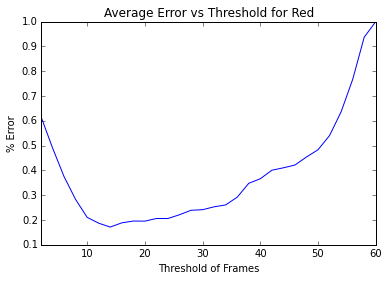

In [20]:

redSeries = pd.Series(reds, index=thresholds)
%matplotlib inline
r = redSeries.plot(title="Average Error vs Threshold for Red")
r.set_xlabel("Threshold of Frames")
r.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print redSeries.idxmin()

Threshold with minimum number of errors:
16


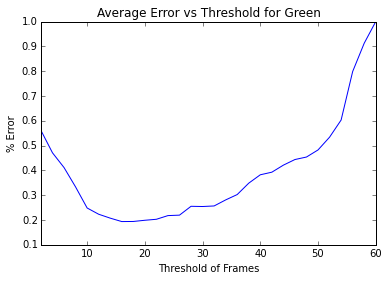

In [21]:
greenSeries = pd.Series(greens, index=thresholds)
%matplotlib inline
g = greenSeries.plot(title="Average Error vs Threshold for Green")
g.set_xlabel("Threshold of Frames")
g.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print greenSeries.idxmin()

Threshold with minimum number of errors:
30


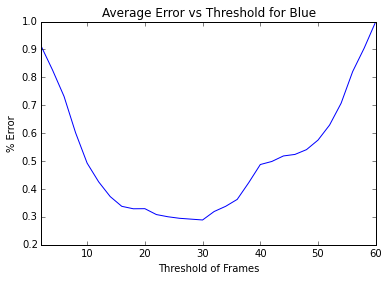

In [22]:
blueSeries = pd.Series(blues, index=thresholds)
%matplotlib inline
b = blueSeries.plot(title="Average Error vs Threshold for Blue")
b.set_xlabel("Threshold of Frames")
b.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print blueSeries.idxmin()


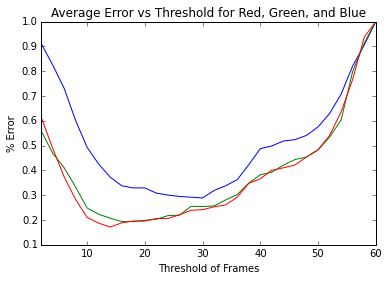

In [23]:
#all on one graph, with colors
b = blueSeries.plot(title="Average Error vs Threshold for Red, Green, and Blue")
g = greenSeries.plot()
r = redSeries.plot()
b.set_xlabel("Threshold of Frames")
b.set_ylabel("% Error")

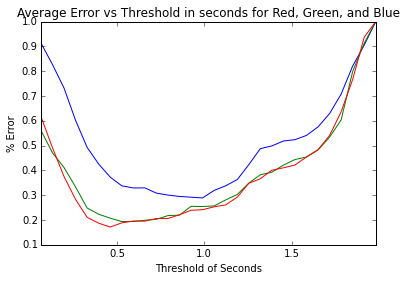

In [24]:
#all on one graph, with colors, x-axis in seconds
thresholdTimes = []

for i in thresholds:
    thresholdTimes.append(i*1/fps)
redSeries = pd.Series(reds, index=thresholdTimes)
greenSeries = pd.Series(greens, index=thresholdTimes)
blueSeries = pd.Series(blues, index=thresholdTimes)
%matplotlib inline
b = blueSeries.plot(title="Average Error vs Threshold in seconds for Red, Green, and Blue")
greenSeries.plot()
redSeries.plot()
b.set_xlabel("Threshold of Seconds")
b.set_ylabel("% Error")

In [25]:
r,g,b = readFromFile("VID_20150123_172926_F.mp4.txt")
for i in range(1,20):
    print peakList(r,i)

[15, 31, 42, 51, 64, 73, 85, 107, 119, 123, 129, 152, 158, 161, 172, 182, 184, 192, 201, 212, 232, 252, 261, 271, 291, 310, 332, 341, 343, 354, 375, 384, 395, 417, 430, 439, 461, 470, 481, 488, 500, 510, 522, 543, 553, 563, 573, 582, 603, 612, 625, 646, 666, 675, 684, 703, 724, 734, 737, 745, 755, 766, 787, 798, 809, 817, 819, 829, 838, 849, 869]
[15, 31, 42, 64, 73, 85, 107, 123, 129, 152, 161, 172, 182, 192, 212, 232, 252, 261, 271, 291, 310, 332, 341, 354, 375, 395, 417, 430, 439, 461, 481, 500, 522, 543, 553, 563, 582, 603, 625, 646, 666, 675, 684, 703, 724, 734, 745, 755, 766, 787, 798, 809, 829, 838, 849, 869]
[15, 42, 64, 85, 107, 129, 152, 161, 172, 182, 192, 212, 232, 252, 271, 291, 310, 332, 354, 375, 395, 417, 439, 461, 481, 500, 522, 543, 553, 563, 582, 603, 625, 646, 666, 675, 684, 703, 724, 745, 766, 787, 809, 829, 849, 869]
[15, 42, 64, 85, 107, 129, 152, 161, 172, 192, 212, 232, 252, 271, 291, 310, 332, 354, 375, 395, 417, 439, 461, 481, 500, 522, 543, 553, 563, 582, 60